# Predicting the Sale Price of Bulldozers using Machine Learning

## 1. Problem definition
* How well can we predict the future price of a bulldozer , 
  given its characteristics and previous examples of how much
  similar bulldozers have been sold for?

## 2. Data
#### This sample data is from kaggle bulldozer price competion: https://www.kaggle.com/c/bluebook-for-bulldozers/data
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set   throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
*  Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
* The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation
* Note. The goal for most regression evaluation metrics is to minimize the error. Ex. Our goal for this project is to create a machine learning model that minimises RMSLE

## 4. Features
* Kaggle provided a data dictionary detailing all of the feature of the dataset. https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import training and validation sets
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

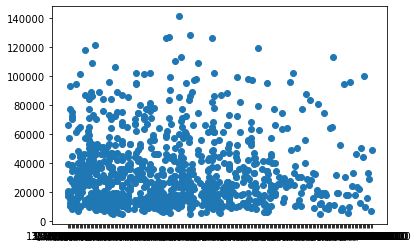

In [5]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

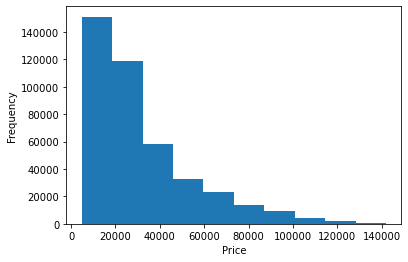

In [6]:
# df[SalePrice].plot().hist()
plt.hist(df['SalePrice'])
plt.ylabel('Frequency')
plt.xlabel('Price');

### Parse the dates because its dtype is object

* When working with time series we should enrich the time and date component as much as possible.
* We can achieve this by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [7]:
# re import the data but parse the dates, if we do this the 'saledate' feature will be parsed
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv', parse_dates=['saledate'], low_memory=False)

In [8]:
df['saledate'].dtype

dtype('<M8[ns]')

In [9]:
df['saledate'][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

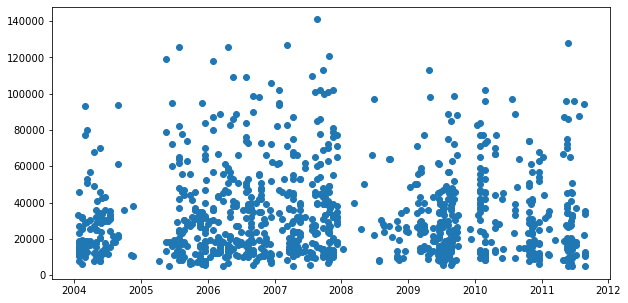

In [10]:
# plot again
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [12]:
df['saledate'][:20]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

## sort data frame by saledate (a practice in time series)

In [13]:
# sort data frame in data order
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [14]:
## make copy or the original df
### just in case we need to revert back to the original data
df_tmp = df.copy()

In [15]:
df_tmp['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Feature Engineering - (add datetime parameters for `saledate` column) 

In [16]:
import operator

def enrich_date(data_frame, param_name, base_param, prop):
    data_frame[param_name] = operator.attrgetter(f"dt.{prop}")(df_tmp[base_param])


In [17]:
# df_tmp['saleYear'] = df_tmp['saledate'].dt.year
# df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
# df_tmp['saleDay'] = df_tmp['saledate'].dt.day
# df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
# df_tmp['saleDayOfYear'] = df_tmp['saledate'].dt.dayofweek

enrich_date(df_tmp, 'SaleYear', 'saledate', 'year')
enrich_date(df_tmp, 'SaleMonth', 'saledate', 'month')
enrich_date(df_tmp, 'SaleDay', 'saledate', 'day')
enrich_date(df_tmp, 'SaleDayOfWeek', 'saledate', 'dayofweek')
enrich_date(df_tmp, 'SaleDayOfYear', 'saledate', 'dayofyear')

In [18]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [19]:
# it is good to edit the data dictionary about the new columns
# also we don't need the saledate now so we can drop it

df_tmp.drop('saledate', axis=1, inplace=True)
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [20]:
df_tmp['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## convert strings to categories using pandas (alternative to onehotencoder)


In [21]:
# function check columns that are string
def find_str_types(data_frame):
    column_list = []
    for i in data_frame.columns:
        if pd.api.types.is_string_dtype(data_frame[i]):
            column_list.append(i)
        
    return column_list



In [22]:
result = find_str_types(df_tmp);
result
len(result), len(df_tmp.columns)

(44, 57)

In [23]:
result

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [24]:
# another way is 


for k, v in df_tmp.items():
    if pd.api.types.is_string_dtype(v):
        print(k)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [25]:
# convert string values to categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered() # will assign numerical value to each category

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [27]:
df_tmp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [28]:
df_tmp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [29]:
# because of pandas categories we can now access our categories in number form 

## Missing Data

In [30]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [31]:
# save preprocessed data as csv
# df_tmp.to_csv('data/bluebook-for-bulldozers/train_temp.csv', index=False)

# import data 
# df_tmp = pd.read_csv(df_tmp.to_csv('data/bluebook-for-bulldozers/train_temp.csv', low_memory=False))


## fill missing values

### fill numeric missing values

In [32]:
numeric_columns = []
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric_columns.append(label)
        
numeric_columns

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'SaleYear',
 'SaleMonth',
 'SaleDay',
 'SaleDayOfWeek',
 'SaleDayOfYear']

In [33]:
df_tmp[numeric_columns]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,SaleYear,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,2012,4,28,5,119


In [34]:
# check which numeric columns have null values
df_tmp[numeric_columns].isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
SaleYear                         0
SaleMonth                        0
SaleDay                          0
SaleDayOfWeek                    0
SaleDayOfYear                    0
dtype: int64

In [35]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        # add binary column telling if the data was missing and filled up
        if pd.isnull(content).sum():
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            # fill missing value with the median
            df_tmp[label] = content.fillna(content.median())


In [36]:
# now check again if there are still missing values
df_tmp[numeric_columns].isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
SaleYear                    0
SaleMonth                   0
SaleDay                     0
SaleDayOfWeek               0
SaleDayOfYear               0
dtype: int64

In [37]:
df_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'SaleYear', 'SaleMonth',
       'SaleDay', 'SaleDayOfWeek', 'SaleDayOfYear', 'auctioneerI

In [38]:
# check the binary columns
df_tmp['auctioneerID_is_missing'].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [39]:
# for k, v in dict(df_tmp.isna().sum()).items():
#     print(f'{k} = {v}')

pd.set_option('display.max_rows', 70) # to stop truncating
df_tmp.isna().sum()


SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

## fill missing values

### fill non numeric missing values

In [40]:
non_numeric_columns = []
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        non_numeric_columns.append(label)
        
non_numeric_columns

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [41]:
df_tmp[non_numeric_columns].isna().sum()

UsageBand                  339028
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc            140727
fiModelSeries              354031
fiModelDescriptor          337882
ProductSize                216605
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System               305611
Enclosure                     334
Forks                      214983
Pad_Type                   331602
Ride_Control               259970
Stick                      331602
Transmission               224691
Turbocharged               331602
Blade_Extension            386715
Blade_Width                386715
Enclosure_Type             386715
Engine_Horsepower          386715
Hydraulics                  82565
Pushblock                  386715
Ripper                     305753
Scarifier                  386704
Tip_Control                386715
Tire_Size                  315060
Coupler       

In [42]:
# turn categorial features into numerical and fill missing values
df_tmp[non_numeric_columns]

# for col in non_numeric_columns:
#     # add a binary column to indicate if the row has missing value and filled up
#     df_tmp[col+'_is_missing'] = pd.isnull(df_tmp[col])
#     # turn categories into number and add +1
#     df_tmp[col] = pd.Categorical(df_tmp[col]).codes + 1 # make -1 to 0

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add a binary column to indicate if the row has missing value and filled up
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # turn categories into number and add +1 
        df_tmp[label] = pd.Categorical(content).codes + 1 # to make -1 to 0


In [43]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [44]:
pd.set_option('display.max_rows', 150) # to stop truncating
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119


In [45]:
# check if there are still missing values
df_tmp.isna().sum()

SalesID                                0
SalePrice                              0
MachineID                              0
ModelID                                0
datasource                             0
auctioneerID                           0
YearMade                               0
MachineHoursCurrentMeter               0
UsageBand                              0
fiModelDesc                            0
fiBaseModel                            0
fiSecondaryDesc                        0
fiModelSeries                          0
fiModelDescriptor                      0
ProductSize                            0
fiProductClassDesc                     0
state                                  0
ProductGroup                           0
ProductGroupDesc                       0
Drive_System                           0
Enclosure                              0
Forks                                  0
Pad_Type                               0
Ride_Control                           0
Stick           

# 5. Build the Machine Learning Model

In [46]:
len(df_tmp)

412698

In [47]:
# %%time

from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_jobs=-1, random_state=42) # random_state is like random.seed, n_jobs=-1 will use all the cores of the computer

# model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

In [48]:
# score the model (baseline score)
# model.score(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

## So why this score isn't reliable?
### because the score is based on a data the model it has seen before, that is why the r_squared is very high

In [49]:
# split the data to train/validation sets
df_val = df_tmp[df_tmp['SaleYear'] == 2012] 
df_train = df_tmp[df_tmp['SaleYear'] != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [50]:
df_val['SaleYear']

405675    2012
401133    2012
406076    2012
409018    2012
409026    2012
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: SaleYear, Length: 11573, dtype: int64

In [51]:
# split data into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_val, y_val = df_val.drop('SalePrice', axis=1), df_val['SalePrice']


# check to make sure there are no errors
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Build an Evaluation Function

In [52]:
# create evaluation function (Root Mean Squared Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates Root Mean Squared Log Error between predictions(y_preds) 
    and true values (y_test)
    """
    # just returning the root of mean_squred_log_error
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


# create a function to evaluate a model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # if the model is performing better on the validation dataset it's a sign that the model is overfitting
    scores = {
        'Training MAE': mean_absolute_error(y_train, train_preds),
        'Validation MAE': mean_absolute_error(y_val, val_preds),
        'Training RMSE' : rmsle(y_train, train_preds),
        'Validation RMSE' : rmsle(y_val, val_preds),
        'Training R^2' : r2_score(y_train, train_preds),
        'Validation R^2' : r2_score(y_val, val_preds)
    }
    return scores

## Testing the model on a subset (to tune the hyperparameters)

In [53]:
# model.fit(X_train[:10000], y_train[:10000]) # option 1

In [54]:
# change max_samples value # option 2
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

In [55]:
%%time 
# decreasing number of samples each estimator can see improves training time
model.fit(X_train, y_train)

Wall time: 29.8 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [56]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Validation MAE': 7177.26365505919,
 'Training RMSE': 0.257745378256977,
 'Validation RMSE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Validation R^2': 0.8320374995090507}

In [57]:
%%time 
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'auto'],
    'max_samples': [10000]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), param_distributions=rf_grid, n_iter=2, cv=5, verbose=True)

# fit the data RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 2min 11s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [58]:
# best model hyperparameters but only 2 combination (n_iter)
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [59]:
show_scores(rs_model)

{'Training MAE': 7104.306460024553,
 'Validation MAE': 8333.569195689588,
 'Training RMSE': 0.31388788191508227,
 'Validation RMSE': 0.3323507156458147,
 'Training R^2': 0.7828894826440629,
 'Validation R^2': 0.7756712935025762}

## Train the model with the best hyperparameters from (n_iter = 100)

In [60]:
%%time

# train the model on the whole dataset using the best hyperparameters that is found on 10,000 samples
ideal_model = RandomForestRegressor(n_estimators=40, min_samples_leaf=1, min_samples_split=14, max_features=0.5, n_jobs=-1, max_samples=None, random_state=42)


ideal_model.fit(X_train, y_train)

Wall time: 2min 36s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [61]:
# scores of ideal model trained on the whole dataset
show_scores(ideal_model)

{'Training MAE': 2953.816113716348,
 'Validation MAE': 5951.247761444453,
 'Training RMSE': 0.14469006962371858,
 'Validation RMSE': 0.2452416398953833,
 'Training R^2': 0.9588145522577225,
 'Validation R^2': 0.8818019502450094}

In [62]:
# scores on rs_model trained on 10000 samples from dataset
show_scores(rs_model)

{'Training MAE': 7104.306460024553,
 'Validation MAE': 8333.569195689588,
 'Training RMSE': 0.31388788191508227,
 'Validation RMSE': 0.3323507156458147,
 'Training R^2': 0.7828894826440629,
 'Validation R^2': 0.7756712935025762}

## Make Predictions on the Test Data

In [129]:
# import the data
df_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv', low_memory=False, parse_dates=['saledate'])

In [130]:
df_test.shape

(12457, 52)

In [131]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [132]:
# test_preds = ideal_model(df_test) # no need to drop because Test.csv has no salaprice column

## Preprocess the data to get the test dataset the same format as the training dataset (because the trainng dataset has been manipulated to fit to the model)


In [133]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.dayofweek
    df["SaleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [134]:
# process test data
df_test = preprocess_data(df_test)
df_test.shape

(12457, 101)

In [135]:
X_train.shape

(401125, 102)

In [136]:
df_test.shape

(12457, 101)

In [137]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [138]:
# df_test['auctioneerID_is_missing'] = False # since there's no missing auctioneerID the function 'preprocess_data' didn't create the column auctioneerID_is_missing. So we will create the column manually.
df_test.insert(56, 'auctioneerID_is_missing', False) # use this instead to avoid the order warning
df_test.head() # check if the columns match

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [140]:
# make predictions on updated test data
test_preds = ideal_model.predict(df_test)

## Format predictions to the format kaggle is asking for

In [145]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['Salesrice'] = test_preds

df_preds

,SalesID,Salesrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [147]:
df_preds.to_csv('data/bluebook-for-bulldozers/test_prediction.csv')

# Feature Importance

seeks to figure out which different attributes of the data were most importance 
when in comes to predicting the target variable ('SalePrice')

In [148]:
# find feature importance of the best model
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [150]:
len(ideal_model.feature_importances_), len(X_train.columns) # we're getting a value to every feature

(102, 102)

In [160]:
# feature_importance = dict(zip(X_train.columns, ideal_model.feature_importances_))
# feature_importance

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
         .sort_values('feature_importances', ascending=False)
         .reset_index(drop=True))
    
    # plot
    fix, ax = plt.subplots(figsize=(10, 6))
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importances');
    ax.invert_yaxis() # to sort from high importance to low

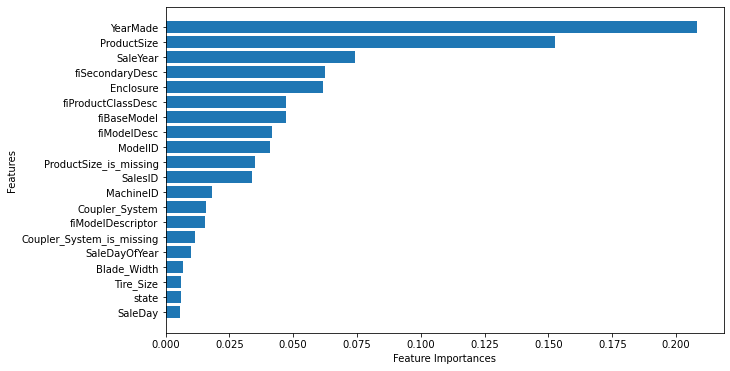

In [161]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [ ]:
# why knowing the feature importances of a trained model model be helpful?